# Kernel

In [120]:
import qiskit
from qiskit.ignis.measurement.discriminator.iq_discriminators import *
from qiskit.result.models import ExperimentResultData
from qiskit import IBMQ
import qiskit.tools.jupyter
import qiskit.pulse as pulse
import qiskit.pulse.pulse_lib as pulse_lib
from qiskit.compiler import assemble
from qiskit.result import Result

import matplotlib.pyplot as plt 
import numpy as np
from copy import deepcopy

%matplotlib inline
plt.rcParams['font.size'] = 16

IBMQ.load_account()

%qiskit_job_watcher

Credentials are already in use. The existing account in the session will be replaced.


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [121]:
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='csc-591-001-ece-')
backend = provider.get_backend('ibmq_almaden')
back_config = backend.configuration().to_dict()
device = pulse.PulseChannelSpec.from_backend(backend)
defaults = backend.defaults()
cmd_def = pulse.CmdDef.from_defaults(defaults.cmd_def, defaults.pulse_library)
n_qubits = backend.configuration().n_qubits

/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/pulse/channels/pulse_channel_spec.py:87: DeprecationWarning: The PulseChannelSpec is deprecated. Use backend.configuration() instead. The supported methods require some migrations; check out the release notes for the complete details.
  DeprecationWarning)
/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/pulse/cmd_def.py:66: DeprecationWarning: The CmdDef is being deprecated. All CmdDef methods are now supported by `InstructionScheduleMap` accessible as `backend.defaults().circuit_instruction_map` for any Pulse enabled system.
  DeprecationWarning)


In [122]:
# from qiskit import *
# cct=QuantumCircuit(2)
# cct.h(0)
# cct.decompose().draw()

In [123]:
# # Create the pulse schedule
# qubits = [0, 1]
# schedules = []
# meas_buffer = 2
# shots = 512
# experiment_name = 'X90pi'

# meas = cmd_def.get('measure', qubits=tuple(range(n_qubits)))

# # Create a calibration schedule for the ground state.
# schedule_no_pi = pulse.Schedule(name='cal_00')
# schedule_no_pi += meas

# # Create a calibration schedule for the excited state.
# schedule_pi = pulse.Schedule(name='cal_11')
# for q in qubits:
#     xgate = cmd_def.get('x', qubits=q)
#     schedule_pi += xgate

# schedule_pi += meas << (schedule_pi.duration + meas_buffer)

# # Measurement schedule. Do an X90p gate on both qubits.
# schedule_x90p = pulse.Schedule(name=experiment_name)
# for q in qubits:
#     x90p = cmd_def.get('u3', qubits=q, P0=np.pi/2., P1=0., P2=0.)
#     schedule_x90p += x90p
    
# schedule_x90p += meas << (schedule_x90p.duration + meas_buffer)
    
# # schedules = [schedule_no_pi, schedule_pi, schedule_x90p]
# # schedules = [schedule_no_pi]

In [124]:
# plt_chs = []
# for q in [0, 1]:
#     plt_chs.append(device.qubits[q].measure)
#     plt_chs.append(device.qubits[q].drive)

# schedules[0].draw(channels_to_plot=plt_chs, scaling=10.)

In [125]:
ibmq_20_tokyo = provider.get_backend('ibmq_20_tokyo')
ibmq_poughkeepsie = provider.get_backend('ibmq_poughkeepsie')
ibmq_boeblingen = provider.get_backend('ibmq_boeblingen')
ibmq_vigo = provider.get_backend('ibmq_vigo')
ibmq_ourense = provider.get_backend('ibmq_ourense')
ibmq_valencia = provider.get_backend('ibmq_valencia')
ibmq_london = provider.get_backend('ibmq_london')
ibmq_burlington = provider.get_backend('ibmq_burlington')
ibmq_almaden = provider.get_backend('ibmq_almaden')
ibmq_rochester = provider.get_backend('ibmq_rochester')
ibmq_essex = provider.get_backend('ibmq_essex')

In [126]:
# ibmq_20_tokyo

In [127]:
# ibmq_rochester

In [128]:
# pp.pprint(ibmq_almaden.configuration())

# Bell-State

In [129]:
# Create the pulse schedule
qubits = [0, 1]
schedules = []
cnot_buffer = 4
meas_buffer = 2
shots = 1024

meas = cmd_def.get('measure', qubits=tuple(range(n_qubits)))
cnot = cmd_def.get('cx', qubits=qubits)

# Create a calibration schedule for the ground state.
schedule_bell = pulse.Schedule(name='Bell')

H = cmd_def.get('u2', qubits=qubits[0], P0=0., P1=np.pi)
schedule_bell += H

schedule_bell += cnot << (schedule_bell.duration + cnot_buffer)

schedule_bell += meas << (schedule_bell.duration + meas_buffer)

schedules = [schedule_bell]

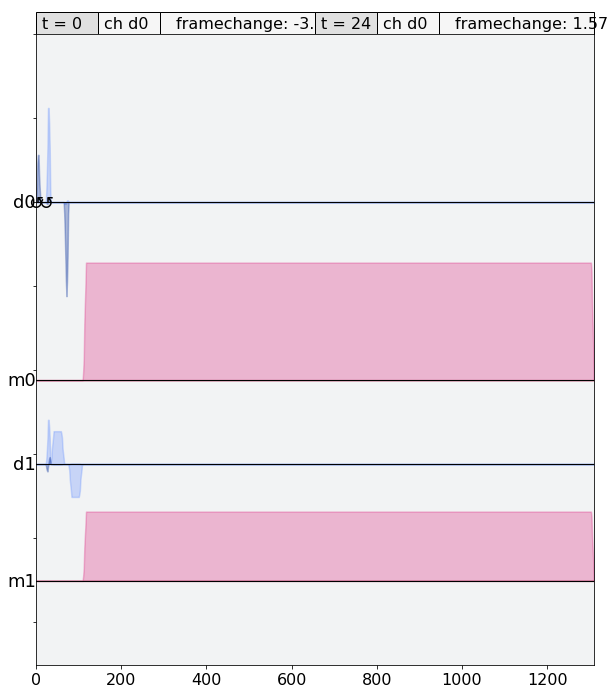

In [111]:
plt_chs = []
for q in [0, 1]:
    plt_chs.append(device.qubits[q].measure)
    plt_chs.append(device.qubits[q].drive)

schedules[0].draw(channels_to_plot=plt_chs, scaling=10.)

In [130]:
qobj = assemble(schedules, backend, meas_level=1, meas_return='single', shots=shots)
job= backend.run(qobj)

In [131]:
result = job.result()

In [146]:
import pickle
with open("bell.pickle","wb") as f:
    pickle.dump(result, f)